We are looking at the Supervised Learning tutorial as part of the general ML tutorial, found here: http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html. We'll take a look at what bias-variance tradeoff is. 

In [47]:
%matplotlib inline

In [48]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

In [49]:
diabetes_X_train = diabetes.data[:-20]
diabetes_X_test = diabetes.data[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

Let's look at the data. There are 10 different physiological variables: 

In [50]:
print len(diabetes.data) # num of samples
print diabetes.data[0]
print diabetes.data[0].shape # vector type of the model - a linear 10-dimensional vector in this case
print diabetes.target[0] # regression target for each sample

442
[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]
(10,)
151.0


In [51]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
print regr.coef_ # the coefficients fit to the linear regression in all the 10 data dimensions

[  3.03499549e-01  -2.37639315e+02   5.10530605e+02   3.27736980e+02
  -8.14131709e+02   4.92814588e+02   1.02848452e+02   1.84606489e+02
   7.43519617e+02   7.60951722e+01]


In [53]:
import numpy as np
np.mean((regr.predict(diabetes_X_test) - diabetes_y_test)**2) # squared error between prediction and actual

2004.5676026898225

In [54]:
regr.score(diabetes_X_test, diabetes_y_test)

0.58507530226905713

In [60]:
X = np.c_[ .5, 1].T
y = [.5, 1]
test = np.c_[ 0, 2].T

In [63]:
regr = linear_model.LinearRegression()

In [64]:
import pylab as pl

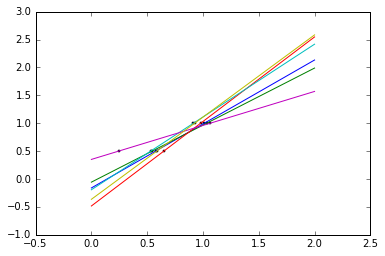

In [65]:
for _ in range(6): 
    this_X = .1*np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    pl.plot(test, regr.predict(test))
    pl.scatter(this_X, y, s=3)  

We see that the variance is large for our tiny data set. Because we don't have much data, any amount of noise messes up the tests. To reduce this variance, we can use a technique called Ridge regression, where we input a parameter called alpha. From the docs, "Small positive values of alpha improve the conditioning of the problem and reduce the variance of the estimates." From http://dept.stat.lsa.umich.edu/~kshedden/Courses/Stat600/Notes/prediction.pdf, "Ridge regression is a compromise between fitting the data as well
as possible (by making ||kY − Xβk||^2 small), while not allowing any one fitted coefficient to get very large". 

In [70]:
regr = linear_model.Ridge(alpha=.1)

In [71]:
pl.figure() 

In [72]:
np.random.seed(0)

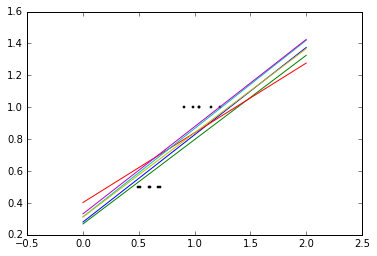

In [73]:
for _ in range(6): 
    this_X = .1*np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    pl.plot(test, regr.predict(test))
    pl.scatter(this_X, y, s=3)  

How can we use this for our diabetes data set? We can choose our alphas so that we minimize "left out error". (? not sure, might have to do with prediction stability: https://en.wikipedia.org/wiki/Generalization_error#Leave-one-out_cross-validation_Stability) 

In [74]:
# Return numbers spaced evenly on a log scale.
alphas = np.logspace(-4, -1, 6)
print alphas

[ 0.0001      0.00039811  0.00158489  0.00630957  0.02511886  0.1       ]


In [75]:
for alpha in alphas: 
    regr.set_params(alpha=alpha)
    regr.fit(diabetes_X_train, diabetes_y_train)
    print regr.score(diabetes_X_test, diabetes_y_test)

0.585111068388
0.585207301544
0.58546775407
0.58555120365
0.583071708555
0.570589994373
